**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/10_classes_00_content.ipynb))

# Chapter 10: Classes & Instances

In contrast to all the built-in data types introduced in the previous chapters, **classes** allow us to create **user-defined data types**. They enable us to model **data** and its **associated behavior** in an *abstract* way. *Concrete* **instances** of these custom data types then **encapsulate** the **state** in a running program. Often, classes are **blueprints** modeling *"real world things"* (e.g., the vectors and matrices below).

Classes and instances follow the **[object-oriented programming <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Object-oriented_programming)** (OOP) paradigm where a *large program* is broken down into many *small components* (i.e., the objects) that *reuse* code. This way, a program that is too big for a programmer to fully comprehend as a whole becomes maintainable via its easier to understand individual pieces.

**Side Note**: Often times, we see the terminology "classes & objects" used instead of "classes & instances" used on forums like [Stack Overflow <img height="12" style="display: inline-block" src="static/link_to_so.png">](https://stackoverflow.com). In this book, we are more precise as both classes and instances are objects on their own in Python.

## Example: Vectors & Matrices

Neither core Python nor the standard library offer an implementation of common [linear algebra <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_algebra) functionalities. While the popular third-party library [numpy](http://www.numpy.org/) is the de-facto standard for that and is recommended to be used for real-life projects, we show how one could use Python's object-oriented language features to implement common matrix and vector operations throughout this chapter.

Without classes, we could model a vector with a `tuple` or a `list` depending on if we want the vector to be mutable or not.

Let's take the following vector $\vec{y}$ as an example and model it as a `tuple`:

$\vec{y} = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}$

In [1]:
y = (1, 2, 3)

In [2]:
y

(1, 2, 3)

We can extend this approach and model a matrix as either a `tuple` holding other `tuple`s or as a `list` holding other `list`s or as a mixture of both. Then, we must decide if the nested objects represent rows or columns. A common convention is to go with the former.

For example, let's model the matrix $\bf{X}$ below as a `list` of row `list`s:

$\bf{X} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

In [3]:
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [4]:
X

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

While this way of representing vectors and matrices in memory keeps things simple, we cannot "work" with them as Python does not know about the **semantics** (i.e., "rules") inherent to vectors and matrices modeled as `tuple`s and `list`s of `list`s.

In the example, we should be able to multiply a matrix like $\bf{X}$ with a vector like $\vec{y}$ if their dimensions match. However, Python does not know how to do this and raises a `TypeError`.

$\bf{X} * \vec{y} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} * \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} = \begin{pmatrix} 14 \\ 32 \\ 50 \end{pmatrix}$

In [5]:
X * y

TypeError: can't multiply sequence by non-int of type 'tuple'

With Python's object-oriented features, we can "teach" it the rules of [linear algebra <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_algebra). By doing so, we create a **[domain-specific language <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Domain-specific_language)** (DSL) that simplifies working with vectors and matrices.

## Class Definition

The compound `class` statement creates a new variable that references a **class object** in memory.

Following the *header* line, the indented *body* syntactically consists of function definitions (i.e., the `dummy_method()`) and variable assignments (i.e., the `dummy_variable`). Any code put here is executed just as if it were outside the `class` statement. The class object acts as a **namespace**, meaning that all the names do *not* exist in the global scope but may only be accessed with the dot operator `.` on the class object. In this context, the names are called **class attributes**.

Within classes, functions are referred to as **methods** that are **bound** to *future* **instance objects**. This binding process means that Python *implicitly* inserts a reference to a *concrete* instance object as the first argument to any **method invocation** (i.e., "function call"). By convention, we call this parameter `self` as it references the instance object on which the method is invoked. Then, as the method is executed, we can set and access attributes via the dot operator `.` on `self`. That is how we manage the *state* of a *concrete* instance within a *generically* written class. At the same time, the code within a method is reused whenever we invoke a method on *any* instance.

As indicated by [PEP 257 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0257/) and also section 3.8.4 of the [Google Python Style Guide <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com/google/styleguide/blob/gh-pages/pyguide.md), we use docstrings to document relevant parts of the new data type. With respect to naming, classes are named according to the [CamelCase <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Camel_case) convention while instances are treated like normal variables and named in [snake\_case <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Snake_case).

In [6]:
class Vector:
    """A standard one-dimensional vector from linear algebra."""

    dummy_variable = "I am a vector"

    def dummy_method(self):
        """A dummy method for illustration purposes."""
        return self.dummy_variable

`Vector` is a full-fledged object on its own with an identity, a type, and a value.

In [7]:
id(Vector)

94199515148736

Its type `type` indicates that it represents a user-defined data type and it evaluates to its fully qualified name.

We have seen the type `type` before in the "*Constructors*" section in [Chapter 2 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/02_functions_00_content.ipynb#Constructors) and also in the "*The `namedtuple` Type*" section in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#The-namedtuple-Type). In the latter case, we could also use a `Point` class but the [namedtuple() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.namedtuple) function from the [collections <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) is a convenient shortcut for custom data types that can be derived out of a plain `tuple`.

In [8]:
type(Vector)

type

In [9]:
Vector

__main__.Vector

The docstrings are transformed into convenient help texts.

In [10]:
Vector?

Init signature: Vector()
Docstring:      A standard one-dimensional vector from linear algebra.
Type:           type
Subclasses:     


In [11]:
help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  A standard one-dimensional vector from linear algebra.
 |  
 |  Methods defined here:
 |  
 |  dummy_method(self)
 |      A dummy method for illustration purposes.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  dummy_variable = 'I am a vector'



We can use the built-in [vars() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#vars) function as an alternative to [dir() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#dir) to obtain a *brief* summary of the attributes on `Vector`. Whereas [vars() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#vars) returns a read-only `dict`-like overview on the *explicitly* defined attributes, [dir() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#dir) also shows *implicitly* added attributes in a `list`.

In [12]:
vars(Vector)

mappingproxy({'__module__': '__main__',
              '__doc__': 'A standard one-dimensional vector from linear algebra.',
              'dummy_variable': 'I am a vector',
              'dummy_method': <function __main__.Vector.dummy_method(self)>,
              '__dict__': <attribute '__dict__' of 'Vector' objects>,
              '__weakref__': <attribute '__weakref__' of 'Vector' objects>})

In [13]:
dir(Vector)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dummy_method',
 'dummy_variable']

With the dot operator `.` we access the class attributes.

In [14]:
Vector.dummy_variable

'I am a vector'

In [15]:
Vector.dummy_method

<function __main__.Vector.dummy_method(self)>

However, invoking the `dummy_method()` raises a `TypeError`. That makes sense as the method expects a *concrete* instance passed in as the `self` argument. However, we have not yet created one.

In [16]:
Vector.dummy_method()

TypeError: dummy_method() missing 1 required positional argument: 'self'

## Instantiation

To create a *new* instance, we need to **instantiate** one.

In the `class` statement, we implement a `__init__()` method that contains all the validation logic that we require a `Vector` instance to adhere to.

`__init__()` is an example of a so-called **special method** that we may use to make new data types work with Python's language features seamlessly. Their naming follows the dunder convention. In this chapter, we introduce some of the more common special methods, and we refer to the [language reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html) for an exhaustive list of all special methods. Special methods not *explicitly* defined in a class are *implicitly* added with a default implementation.

The `__init__()` method (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__init__)) is responsible for **initializing** a *new* instance object immediately after its creation. That usually means setting up some **instance attributes**. In the example, a new vector is created from some finite and iterable object (e.g., a `tuple`) passed in as the `data` argument. The elements provided by the `data` argument are first cast as `float` objects and then stored in a `list` object named `_entries` on the new instance object. Together, the `float`s represent all the state encapsulated within an instance.

A best practice is to *separate* the usage (i.e., "behavior") of a new data type from its implementation. By convention, attributes that should not be accessed from "outside" of an instance start with one leading underscore `_`. In the example, the instance attribute `_entries` is such an **implementation detail**: We could have decided to store a vector's entries in a `tuple` instead of a `list`. However, this decision should *not* affect how a `Vector` instance is to be used. Moreover, if we changed how the `_entries` are modeled later on, this must *not* break any existing code using `Vector`s. This idea is also known as **[information hiding <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Information_hiding)** in software engineering.

In [17]:
class Vector:
    """A standard one-dimensional vector from linear algebra.

    All entries are converted to floats.
    """

    def __init__(self, data):
        """Initiate a new vector.

        Args:
            data (iterable): the vector's entries;
                must be finite and have at least one element

        Raises:
            ValueError: if the provided data do not have enough entries
        """
        self._entries = list(float(x) for x in data)
        if len(self._entries) == 0:
            raise ValueError("a vector must have at least one entry")

To create a `Vector` instance, we call the `Vector` class with the `()` operator. This call is forwarded to the `__init__()` method behind the scenes. That is what we mean by saying "make new data types work with Python's language features seamlessly" above: We use `Vector` just as any other built-in constructor.

In [18]:
v = Vector([1, 2, 3])

`v` is a full-fledged object as well.

In [19]:
id(v)

140613942015760

Unsurprisingly, the type of `v` is `Vector`.

In [20]:
type(v)

__main__.Vector

Every instance comes with a special `__class__` attribute that also references the corresponding class object.

In [21]:
v.__class__

__main__.Vector

`v`'s semantic "value" is not so clear yet. We fix this in the next section.

In [22]:
v

Although the `__init__()` method defines *two* parameters, we must call it with only *one* `data` argument. As noted above, Python implicitly inserts a reference to the newly created instance object (i.e., `v`) as the first argument as `self`.

Calling a class object with a wrong number of arguments leads to a generic `TypeError` ...

In [23]:
Vector()

TypeError: __init__() missing 1 required positional argument: 'data'

In [24]:
Vector(1, 2, 3)

TypeError: __init__() takes 2 positional arguments but 4 were given

... while creating a `Vector` instance from an iterable with no elements raises a custom `ValueError`.

In [25]:
Vector([])

ValueError: a vector must have at least one entry

Even though we can access the `_entries` attribute on the `v` object, we are not supposed to do that because of the underscore `_` convention. In other words, only an expression like `self._entries` within a method is allowed.

In [26]:
v._entries  # by convention not allowed

[1.0, 2.0, 3.0]

## Text Representations

For all the built-in data types, an object's value is represented in a *literal notation*, implying that we can simply copy and paste the value into another code cell to create a *new* object with the *same* value.

The exact representation of the value does *not* have to be identical to the one used to create the object. For example, we can create a `tuple` object without using parentheses and Python still outputs its value with `(` and `)`.

In [27]:
y = 1, 2, 3

In [28]:
y

(1, 2, 3)

In [29]:
(1, 2, 3)

(1, 2, 3)

To control how objects of a user-defined data type are represented as text, we implement the `__repr__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__repr__)) and `__str__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__str__)) methods. Both take only a `self` argument and must return a `str` object.

In [30]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self._entries)
        return f"Vector(({args}))"

    def __str__(self):
        first, last = self._entries[0], self._entries[-1]
        n_entries = len(self._entries)
        return f"Vector({first:.1f}, ..., {last:.1f})[{n_entries:d}]"

Now, when `v` is evaluated in a code cell, we see the return value of the `__repr__()` method used as a "literal" notation.

According to the specification, `__repr__()` should return a `str` object that, when entered in a code cell, creates a *new* instance with the *same* state (i.e., their `_entries` attributes compare equal) as the original one. In other words, it should return a text representation of the object optimized for direct consumption by the Python interpreter. That is often useful when debugging or logging large applications.

Our implementation of `__repr__()` in the `Vector` class uses to a `tuple` notation for the `data` argument. So, even if we create `v` from a `list` object like `[1, 2, 3]` and even though the `_entries` are stored as a `list` object internally, a `Vector` instance's text representation "defaults" to `((` and `))` in the output. This decision is arbitrary and we could have used a `list` notation for the `data` argument as well.

In [31]:
v = Vector([1, 2, 3])

In [32]:
v

Vector((1.000, 2.000, 3.000))

If we copy and paste the value of the `v` object, we create a *new* `Vector` instance with the *same* state as `v`.

In [33]:
Vector((1.000, 2.000, 3.000))

Vector((1.000, 2.000, 3.000))

To be more explicit, we could alternatively call the built-in [repr()]( https://docs.python.org/3/library/functions.html#repr) function with `v` as the argument.

In [34]:
repr(v)

'Vector((1.000, 2.000, 3.000))'

On the contrary, the `__str__()` method should return a *human-readable* text representation of the object. We can use the built-in [str() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-str) and [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print) functions to obtain this representation explicitly.

For our `Vector` class, this representation only shows a vector's first and last entries followed by the number of entries in brackets. So, even for a `Vector` containing millions of entries, we could easily make sense of the representation. In other words, a human understands the semantic meaning of the $0$s and $1$s in memory.

In [35]:
str(v)

'Vector(1.0, ..., 3.0)[3]'

The [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print) function does not show the enclosing quotes.

In [36]:
print(v)

Vector(1.0, ..., 3.0)[3]


Below is a first implementation of the `Matrix` class that stores the entries internally as a list of lists.

In [37]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        for row in self._entries[1:]:
            if len(row) != len(self._entries[0]):
                raise ValueError("rows must have the same number of entries")
        if len(self._entries) == 0:
            raise ValueError("a matrix must have at least one entry")

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    def __str__(self):
        first, last = self._entries[0][0], self._entries[-1][-1]
        m, n = len(self._entries), len(self._entries[0])
        return f"Matrix(({first:.1f}, ...), ..., (..., {last:.1f}))[{m:d}x{n:d}]"

`Matrix` is of course a  full-fledged object as well.

In [38]:
id(Matrix)

94199515162880

In [39]:
type(Matrix)

type

In [40]:
Matrix

__main__.Matrix

Let's create a new `Matrix` instance from a `list` of `tuple`s.

In [41]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [42]:
id(m)

140613942007376

In [43]:
type(m)

__main__.Matrix

The text representations work as above.

In [44]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

In [45]:
print(m)

Matrix((1.0, ...), ..., (..., 9.0))[3x3]


Passing an invalid `data` argument when instantiating a `Matrix` results in the documented exceptions.

In [46]:
Matrix(())

ValueError: a matrix must have at least one entry

In [47]:
Matrix([(1, 2, 3), (4, 5)])

ValueError: rows must have the same number of entries

## Computed Properties

After creation, a `Matrix` instance exhibits certain properties that depend only on the concrete `data` encapsulated in it and can *not* be set to some arbitrary value. For example, every `Matrix` instance implicitly has *two* dimensions: These are commonly denoted as $m$ and $n$ in math and represent the number of rows and columns.

We design our `Matrix` class such that instances have two attributes, `n_rows` and `n_cols`, that are automatically set to the correct `int` objects. To do that, we use the [property() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#property) built-in with a special `@` syntax and implement **derived attributes** that are computed from an object's current state. They work like methods except that they do not need to be invoked with the call operator `()` but can be accessed as if they were instance variables.

To reuse their code, we integrate the new properties already within the `__init__()` method.

In [48]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        for row in self._entries[1:]:
            if len(row) != self.n_cols:
                raise ValueError("rows must have the same number of entries")
        if self.n_rows == 0:
            raise ValueError("a matrix must have at least one entry")

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    @property
    def n_rows(self):
        return len(self._entries)

    @property
    def n_cols(self):
        return len(self._entries[0])

The revised `m` models a $2 \times 3$ matrix.

In [49]:
m = Matrix([(1, 2, 3), (4, 5, 6)])

In [50]:
m.n_rows, m.n_cols

(2, 3)

In its basic form, properties are *read-only* attributes. This makes sense for `Matrix` instances where we can *not* "set" how many rows and columns there are while keeping the `_entries` unchanged.

In [51]:
m.n_rows = 3

AttributeError: can't set attribute

## Instance Methods vs. Class Methods

The methods we have seen so far are all **instance methods**. The characteristic idea behind an instance method is that the behavior it provides either depends on the state of a concrete instance or mutates it. In other words, an instance method works with attributes on the `self` argument. If it does *not* need access to `self` to do its job, it is conceptually *not* an instance method and we should probably convert it into some other kind of method.

An example of an instance method from linear algebra is the `transpose()` method below that switches the rows and columns of a `Matrix` instance and returns a *new* `Matrix` instance based off that. It is implemented by passing the *iterator* created with the [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) built-in as the `data` argument to the `Matrix` constructor. Without a concrete `Matrix`'s rows and columns, `transpose()` could not work, conceptually speaking.

In [52]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    def transpose(self):
        return Matrix(zip(*self._entries))

The `transpose()` method returns a *new* `Matrix` instance where the rows and columns are flipped.

In [53]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [54]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

In [55]:
m.transpose()

Matrix(((1.000, 4.000, 7.000,), (2.000, 5.000, 8.000,), (3.000, 6.000, 9.000,)))

Two invocations of `transpose()` may be chained, which negates its overall effect but still creates a *new* instance object.

In [56]:
n = m.transpose().transpose()

In [57]:
n

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

In [58]:
m is n

False

Unintuitively, the comparison operator `==` returns a wrong result as `m` and `n` have `_entries` attributes that compare equal. We fix this in the "*Operator Overloading*" section below.

In [59]:
m == n

False

Sometimes, it is useful to attach functionality to a class object that does *not* depend on the state of a concrete instance but on the class as a whole. Such methods are called **class methods** and can be created with the [classmethod() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#classmethod) built-in combined with the `@` syntax. Then, Python adapts the binding process described above such that it implicitly inserts a reference to the class object itself when the method is invoked. By convention, we name this parameter `cls`. Class methods are commonly used to provide an alternative way to create instances, usually from a different kind of arguments.

As an example, `from_columns()` expects an iterable of columns instead of rows as its `data` argument. It forwards the invocation to the `__init__()` method (i.e., what `cls(data)` does behind the scenes; `cls` references the *same* class object as `Matrix`), then calls the `transpose()` method on the newly created instance, and lastly returns the instance created by `transpose()`. Again, we are intelligently reusing a lot of code.

In [60]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    def transpose(self):
        return Matrix(zip(*self._entries))

    @classmethod
    def from_columns(cls, data):
        return cls(data).transpose()

We use the alternative `from_columns()` constructor to create a `Matrix` equivalent to `m` above from a `list` of columns instead of rows.

In [61]:
m = Matrix.from_columns([(1, 4, 7), (2, 5, 8), (3, 6, 9)])

In [62]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

There is also a [staticmethod() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#staticmethod) built-in to be used with the `@` syntax to define methods that are *independent* from both the class and instance objects but nevertheless related semantically to a class. In this case, the binding process is disabled an no argument is implicitly inserted upon a method's invocation. Such **static methods** are not really needed most of the time and we omit them here fore brevity.

## Sequence Emulation

As discussed in detail in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Collections-vs.-Sequences), a sequence is any finite and iterable container type with a *predictable* order of its elements such that we can label each element with an index in the range `0 <= index < len(sequence)`.

To make `Vector` and `Matrix` instances emulate sequences, we implement the `__len__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__len__)) and `__getitem__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__getitem__)) methods . While the former returns the total number of elements in a container and is automatically invoked on any object passed to the built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function, the latter is invoked by the interpreter behind the scenes when we use the indexing operator `[]`.

In the example, both `__len__()` and `__getitem__()` delegate parts of the work to the embedded `list` object named `_entries`. This is a design principle known as [delegation <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Delegation_%28object-oriented_programming%29) in software engineering. We implicitly invoke the `__len__()` method inside the `__init__()` method already with `len(self)`. This not only reuses code but also ensures that we calculate the number of entries only in one way within the entire class.

In [63]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        if len(self) == 0:
            raise ValueError("a vector must have at least one entry")

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self._entries)
        return f"Vector(({args}))"

    def __len__(self):
        return len(self._entries)

    def __getitem__(self, index):
        return self._entries[index]

Now, we may obtain the number of elements with [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) and index into `Vector` instances.

In [64]:
v = Vector([1, 2, 3])

In [65]:
len(v)

3

In [66]:
v[0]

1.0

Negative indexes work "out of the box" because of the delegation to the `list` type.

In [67]:
v[-1]

3.0

Somehow "magically" we can loop over `v` with a `for` statement.

In [68]:
for entry in v:
    print(entry, end="  ")

1.0  2.0  3.0  

Behind the scenes, Python simply loops over the indexes implied by `len(v)` with the help of the [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) built-in and obtains each `entry` one by one. With sequence emulation, we should never have to do that "manually."

In [69]:
for index in range(len(v)):
    entry = v[index]
    print(entry, end="  ")

1.0  2.0  3.0  

`v` may also be iterated over in reverse order with the [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in.

In [70]:
for entry in reversed(v):
    print(entry, end="  ")

3.0  2.0  1.0  

Because of the iteration, membership testing with the `in` operator also comes "for free." Here, Python compares the object to be searched to each element with the `==` operator and stops early once one compares equal. That constitutes a [linear search <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_search) as seen before.

In [71]:
1 in v

True

In [72]:
99 in v

False

So far, indexing is a *read-only* operation.

In [73]:
v[0] = 99

TypeError: 'Vector' object does not support item assignment

Because a `Matrix` is two-dimensional, we must decide how we *flatten* the `_entries`. We *choose* the approach where we loop over the first row, then the second row, and so on. This is called a **[row major approach <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Row-_and_column-major_order)**.

In addition to indexing by `int` objects, we also implement indexing by 2-`tuple`s of `int`s where the first element indicates the row and the second the column. Deciding what to do inside a method depending on the *type* of an argument is known as **type dispatching**. We achieve that with the built-in [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance) function.

Lastly, we ensure that integer indexing also works with negative values as we are used to from sequences in general.

Note how all of the methods work together:
- `__init__()`, `__len__()`, and `__getitem__()` reuse the `n_rows` and `n_cols` properties
- `__init__()` and `__getitem__()` invoke `__len__()` via the `len(self)` expressions

In [74]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        for row in self._entries[1:]:
            if len(row) != self.n_cols:
                raise ValueError("rows must have the same number of entries")
        if len(self) == 0:
            raise ValueError("a matrix must have at least one entry")

    @property
    def n_rows(self):
        return len(self._entries)

    @property
    def n_cols(self):
        return len(self._entries[0])

    def __len__(self):
        return self.n_rows * self.n_cols

    def __getitem__(self, index):
        if isinstance(index, int):
            if index < 0:
                index += len(self)
            if not (0 <= index < len(self)):
                raise IndexError("integer index out of range")
            row, col = divmod(index, self.n_cols)
            return self._entries[row][col]
        elif (
            isinstance(index, tuple) and len(index) == 2
            and isinstance(index[0], int) and isinstance(index[1], int)
        ):
            return self._entries[index[0]][index[1]]
        raise TypeError("index must be either an int or a tuple of two int's")

Now, we may use a `Matrix` instance just like any other sequence ...

In [75]:
m = m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [76]:
len(m)

9

In [77]:
m[0]

1.0

In [78]:
m[-1]

9.0

... but also index in the two dimensions separately.

In [79]:
m[0, 2]

3.0

In [80]:
m[-1, -1]

9.0

As before, Python figures out the iteration on its own ...

In [81]:
for entry in m:
    print(entry, end="  ")

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  

In [82]:
for entry in reversed(m):
    print(entry, end="  ")

9.0  8.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  

... and makes the `in` operator do a linear search.

In [83]:
1 in m

True

In [84]:
99 in m

False

### The Python Data Model

Sequence emulation itself is *not* a property of object-oriented languages in general. Instead, it is a behavior any data type may or may not exhibit in Python.

The collection of all such behaviors a programming language offers is commonly referred to as its **object model**. In Python, the term **data model** is used instead and all possible behaviors are documented in the [language reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html), in particular, in the section on special methods. We can think of the data model as the collection of all the behaviors we can make our user-defined data types follow. Pythonistas also use the term **protocol** instead of behavior, for example, we may say that the `Vector` and `Matrix` classes follow the sequence protocol.

So, merely defining the *two* `__len__()` and `__getitem__()` methods is enough to make instances of any user-defined type behave like the built-in sequences in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb). Yet, there we defined sequences as all objects having the *four* properties of being finite, iterable, and ordered container types. And, these properties correspond to special methods by the names of `__len__()`, `__iter__()`, `__reversed__()`,  and `__contains__()` as we see in the next sub-section. Thus, Python "magically" knows how to derive the logic for the `__iter__()`, `__reversed__()`,  and `__contains__()` methods from the combination of the `__len__()` and `__getitem__()` methods. In general, while some special methods are related, others are not. Understanding these relationships means understanding the Python data model and vice versa. That is what every aspiring data scientist should aim for.

On the contrary, we could also look at special methods individually. Whereas `__len__()` is invoked on the object passed to [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len), Python "translates" the indexing operator applied on any name like `a[i]`, for example, into the method invocation `a.__getitem__(i)`. So, in both cases, the special methods are executed according to a deterministic rule of the language. In that sense, they act as some sort of syntactic sugar. Thus, they even work if only one of them is defined. For example, without `__len__()`, iteration with a `for`-loop still works but only in forward direction.

### Alternative Iteration

When implementing the sequence protocol for our `Matrix` class, we had to make the assumption that the user of our class wants to iterate over the entries in a rows first fashion. While such assumptions can often be justified by referring to popular conventions (e.g., mathematicians usually look at matrices also in a "row by column" way), we could instead provide several iteration methods such that the user may choose one, just like `dict`s come with several built-in methods that provide iteration.

In the revised `Matrix` class below, we add the `rows()`, `cols()`, and `entries()` methods that return *iterators* providing different and memory efficient ways of looping over the entries. `rows()` and `cols()` sequentially produce `Vector` instances representing individual rows and columns. This is in line with the popular idea in linear algebra to view matrices as a collection of either row or column vectors. Further, `entries()` by default produces the entries in the matrix one by one in a flat and row major fashion. Called with the optional `row_major=False` flag, it does the same in a column major fashion. The optional `reverse=True` flag allows iteration in backwards order.

We also implement the `__iter__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__iter__)) and `__reversed__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__reversed__)) methods that immediately forward invocation to `entries()`. So, Python does not need to fall back to `__len__()` and `__getitem__()`.

In [85]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    @property
    def n_rows(self):
        return len(self._entries)

    @property
    def n_cols(self):
        return len(self._entries[0])

    def rows(self):
        return (Vector(r) for r in self._entries)

    def cols(self):
        return (
            Vector(self._entries[r][c] for r in range(self.n_rows)) for c in range(self.n_cols)
        )

    def entries(self, *, reverse=False, row_major=True):
        if reverse:
            rows, cols = (range(self.n_rows - 1, -1, -1), range(self.n_cols - 1, -1, -1))
        else:
            rows, cols = range(self.n_rows), range(self.n_cols)
        if row_major:
            return (self._entries[r][c] for r in rows for c in cols)
        return (self._entries[r][c] for c in cols for r in rows)

    def __iter__(self):
        return self.entries()

    def __reversed__(self):
        return self.entries(reverse=True)

The revised version of `Vector` below also works without `__len__()` and `__getitem__()` methods and leaves the creation of memory efficient iterators up to the embedded `list` object in `_entries` by using the built-in [iter() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#iter) and [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) functions. Also, `__repr__()` now relies on the sequence protocol as the instance loops over "itself" with `for x in self`, a subtle reuse of code again. 

In [86]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __iter__(self):
        return iter(self._entries)

    def __reversed__(self):
        return reversed(self._entries)

In [87]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [88]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

Iteration works as before ...

In [89]:
for entry in m:
    print(entry, end="  ")

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  

In [90]:
for entry in reversed(m):
    print(entry, end="  ")

9.0  8.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  

... but now we have some ways of customizing it.

In [91]:
for row_vector in m.rows():
    print(row_vector, end="  ")

Vector((1.000, 2.000, 3.000))  Vector((4.000, 5.000, 6.000))  Vector((7.000, 8.000, 9.000))  

In [92]:
for col_vector in m.cols():
    print(col_vector, end="  ")

Vector((1.000, 4.000, 7.000))  Vector((2.000, 5.000, 8.000))  Vector((3.000, 6.000, 9.000))  

In [93]:
for entry in m.entries():
    print(entry, end="  ")

1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  

In [94]:
for entry in m.entries(row_major=False):
    print(entry, end="  ")

1.0  4.0  7.0  2.0  5.0  8.0  3.0  6.0  9.0  

## Mutability vs. Immutability

In the above implementations, the instance attribute `_entries` on a `Vector` or `Matrix` instances references either a `list` or a `list` of row `list`s , which is by the convention of the leading underscore `_` an implementation detail. If users of our classes adhere to this convention, `Vector` and `Matrix` instances can be regarded as *immutable*.

In line with the implied immutability, we implemented the `transpose()` method such that it returns a *new* `Matrix` instance. Instead, we could make the method change the internal `self._entries` attribute *in place* as we do in the next example. To indicate this mutation to the user of the `Matrix` class clearly, the revised `transpose()` method returns `None`. That mirrors, for example, how the mutating methods of the built-in `list` type behave (cf., [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#List-Methods)).

Such decisions are better made consciously when designing a custom data type. The main trade-off is that immutable data types are typically easier to reason about when reading code whereas mutable data types tend to be more memory efficient and make programs faster as less copying operations take place in memory. However, this trade-off only becomes critical when we deal with big amounts of data.

In [95]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    def transpose(self):
        self._entries = list(list(float(x) for x in r) for r in (zip(*self._entries)))
        return None

In [96]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [97]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

Transposing `m` has *no* cell output ...

In [98]:
m.transpose()

... so we must look at `m` again.

In [99]:
m

Matrix(((1.000, 4.000, 7.000,), (2.000, 5.000, 8.000,), (3.000, 6.000, 9.000,)))

A downside of returning `None` is that we can *not* chain repeated invocations of `transpose()`.

In [100]:
m.transpose().transpose()

AttributeError: 'NoneType' object has no attribute 'transpose'

### Enabling Method Chaining

To fix the missing method chaining, we end the `transpose()` method with `return self`, which returns a reference to the instance on which the method is invoked.

In [101]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    def __iter__(self):  # adapted for brevity; uses parts of entries()
        rows, cols = range(len(self._entries)), range(len(self._entries[0]))
        return (self._entries[r][c] for r in rows for c in cols)

    def transpose(self):
        self._entries = list(list(float(x) for x in r) for r in (zip(*self._entries)))
        return self

In [102]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [103]:
m

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

The downside of this approach is that a user may unknowingly end up with *two* references to the *same* instance. That can only be mitigated by clear documentation.

In [104]:
n = m.transpose()

In [105]:
m

Matrix(((1.000, 4.000, 7.000,), (2.000, 5.000, 8.000,), (3.000, 6.000, 9.000,)))

In [106]:
n

Matrix(((1.000, 4.000, 7.000,), (2.000, 5.000, 8.000,), (3.000, 6.000, 9.000,)))

In [107]:
m is n

True

### Customizing Indexing

Analogous to the `__getitem__()` method above, there are also the `__setitem__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__setitem__)) and `__delitem__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__delitem__)) methods that assign a new element to or delete an existing element from a sequence.

Whereas deleting an individual entry in a `Vector` or `Matrix` instance may *not* really make sense semantically, we interpret this as setting the corresponding entry to "unknown" (i.e., `NaN`). Also, we implement changing individual entries via index assignment. Here, `__setitem__()` delegates the assignment to the embedded `list` object after casting the assigned value as a `float`. While the example below only allows indexing by an integer, it could be generalized to slicing as well.

In [108]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __getitem__(self, index):
        return self._entries[index]

    def __setitem__(self, index, value):
        self._entries[index] = float(value)

    def __delitem__(self, index):
        self._entries[index] = float("NaN")

In [109]:
v = Vector([1, 2, 3])

In [110]:
v

Vector((1.000, 2.000, 3.000))

`v` can now be changed in place.

In [111]:
del v[0]

In [112]:
v

Vector((nan, 2.000, 3.000))

In [113]:
v[0] = 99

In [114]:
v

Vector((99.000, 2.000, 3.000))

After this discourse on mutable `Vector` and `Matrix` classes, we continue with immutable classes in the rest of this chapter.

## Polymorphism

A function is considered **polymorphic** if it can work with *different* data types. The main advantage is reuse of the function's code. Polymorphism goes hand in hand with the concept of [duck typing <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Duck_typing) mentioned in previous chapters.

We know polymorphic functions already: The built-in [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) function is a trivial example that works with all kinds of `iterable` arguments.

In [115]:
sum((1, 2, 3, 4))

10

In [116]:
sum([1, 2, 3, 4])

10

In [117]:
sum({1, 2, 3, 4})

10

In [118]:
sum({1: 996, 2: 997, 3: 998, 4: 999})  # loops over the keys

10

As we implemented the `Vector` and `Matrix` classes to be iterable, we may pass them to [sum() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sum) as well.

In [119]:
sum(Vector([1, 2, 3, 4]))

10.0

In [120]:
sum(Matrix([(1, 2), (3, 4)]))

10.0

A polymorphic function with a semantic meaning in the context of linear algebra would be one that calculates the [Euclidean norm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm) for vectors, which is a generalization of the popular [Pythagorean theorem <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Pythagorean_theorem). Extending the same kind of computation to a matrix results in the even more general [Frobenius norm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm):

$$\lVert \bf{X} \rVert_F = \sqrt{ \sum_{i=1}^m \sum_{j=1}^n x_{ij}^2 }$$

The `norm()` function below can handle both a `Vector` or a `Matrix` instance and is therefore polymorphic. In this sense, `Vector` and `Matrix` instances "walk" and "quack" in a similar way. In particular they they both can provide all their entries as a flat sequence.

In [121]:
import math

In [122]:
def norm(vector_or_matrix):
    """Calculate the Frobenius or Euclidean norm of a matrix or vector.

    Args:
        vector_or_matrix (Vector/Matrix): the entries whose squares
            are summed up

    Returns:
        norm (float)
    """
    return math.sqrt(sum(x ** 2 for x in vector_or_matrix))

While `norm()` is intended to work with `Vector` or `Matrix` instances ...

In [123]:
norm(Vector([1, 2, 3, 4]))

5.477225575051661

In [124]:
norm(Matrix([(1, 2), (3, 4)]))

5.477225575051661

... it also works for any sequence of numbers.

In [125]:
norm([1, 2, 3, 4])

5.477225575051661

An important criterion if different classes are compatible in the sense that the same polymorphic function can work with them is that they implement the same **interface**.

Whereas many other programming languages formalize this [concept <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Protocol_%28object-oriented_programming%29), in Python the term refers to the idea that different classes define the same attributes and implement the various protocols behind the special methods in a consistent way. This is what it means to "walk" and "quack" alike.

## Representations of Data

> "If you change the way you look at things, the things you look at change."
> -- philosopher and personal coach [Dr. Wayne Dyer <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Wayne_Dyer)

Sometimes, it is helpful to view a vector as a matrix with either one row or one column. On the contrary, such a matrix can always be interpreted as a vector again. Changing the representation of the same underlying data (i.e., the `_entries`) can be viewed as "changing" an object's data type, for which, however, there is no syntax.

Thus, we implement the `as_matrix()` and `as_vector()` methods below that create *new* `Matrix` or `Vector` instances out of existing `Vector` or `Matrix` instances, respectively. Internally, both methods rely on the sequence protocol again (i.e., `for x in self`). Also, `as_matrix()` interprets the `Vector` instance as a column vector by default (i.e., the `column=True` default argument).

In [126]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __iter__(self):
        return iter(self._entries)

    def as_matrix(self, *, column=True):
        if column:
            return Matrix([x] for x in self)
        return Matrix([(x for x in self)])

In [127]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    @property
    def n_rows(self):
        return len(self._entries)

    @property
    def n_cols(self):
        return len(self._entries[0])

    def __iter__(self):  # adapted for brevity; uses parts of entries()
        return (self._entries[r][c] for r in range(self.n_rows) for c in range(self.n_cols))

    def as_vector(self):
        if not (self.n_rows == 1 or self.n_cols == 1):
            raise RuntimeError("one dimension (m or n) must be 1")
        return Vector(x for x in self)

In [128]:
v = Vector([1, 2, 3])

In [129]:
v

Vector((1.000, 2.000, 3.000))

Let's interpret `v` as a column vector and create a matrix of dimension $3 \times 1$.

In [130]:
m = v.as_matrix()

In [131]:
m

Matrix(((1.000,), (2.000,), (3.000,)))

In [132]:
m.n_rows, m.n_cols

(3, 1)

By chaining `as_matrix()` and `as_vector()` we get a *new* `Vector` instance back that is equivalent to the given `v`.

In [133]:
v.as_matrix().as_vector()

Vector((1.000, 2.000, 3.000))

In the same way, we can also interpret `v` as a row vector and create a $1 \times 3$ matrix.

In [134]:
m = v.as_matrix(column=False)

In [135]:
m

Matrix(((1.000, 2.000, 3.000,)))

In [136]:
m.n_rows, m.n_cols

(1, 3)

In [137]:
v.as_matrix(column=False).as_vector()

Vector((1.000, 2.000, 3.000))

Interpreting a matrix as a vector only works if one of the two dimensions $m$ or $n$ is $1$. If this requirement is not satisfied, we get a `RuntimeError` as raised in `as_vector()` above.

In [138]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])

In [139]:
m.as_vector()

RuntimeError: one dimension (m or n) must be 1

## Operator Overloading

Using special methods such as `__add__()`, `__sub__()`, `__mul__()`, and some others, user-defined data types can emulate numeric types (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types)): Then, `Vector` and `Matrix` instances can be added together, subtracted from one another, or be multiplied together. We use them to implement the arithmetic rules from linear algebra.

The OOP concept behind this is **[operator overloading <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Operator_overloading)** as first mentioned in the context of string concatenation in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Operator-Overloading).

### Arithmetic Operators

To understand the protocol behind arithmetic operators, we first look at the simple case of how an `int` object and a `float` object are added. The expression `1 + 2.0` is "translated" by Python into an implicit method invocation of the form `1.__add__(2.0)`. This is why all the special methods behind binary operators take two arguments, `self` and, by convention, `other`. To allow binary operators to work with objects of *different* data types, Python expects the `__add__()` method on the `1` object to return `NotImplemented` if it does not know how to deal with the `2.0` object and then proceeds by invoking the *reverse* special method `2.0.__radd__(1)`. With this protocol, one can create *new* data types that know how to execute arithmetic operations with *existing* data types *without* having to change the latter. By convention, the result of a binary operation should always be a *new* instance object and *not* a mutation of an existing one.

Before implementing the arithmetic operators, we must first determine what other data types are allowed to interact with our `Vector` and `Matrix` instances and also how the two interact with each other. Conceptually, this is the same as to ask how strict we want the rules from linear algebra to be enforced in our model world. For example, while it is obvious that two vectors with the same number of entries may be added or subtracted, we could also allow a scalar value to be added to a vector. That seems awkward at first because it is an illegal operation in linear algebra. However, for convenience in our programs, we could interpret any scalar as a "constants" vector of the "right size" and add it to each entry in a `Vector`. This idea can be generalized into what is called **[broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)** in [numpy](https://docs.scipy.org/doc/numpy/index.html). We often see "dirty hacks" like this in code. They are no bugs but features supposed to make the user of a library more productive.

In this chapter, we model the following binary arithmetic operations:

- **Addition** / **Subtraction**
  - `Vector` with `Vector` (if number of entries match; commutative)
  - `Matrix` with `Matrix` (if dimensions $m$ and $n$ match; commutative)
  - `Matrix` / `Vector` with scalar (the scalar is broadcasted; non-commutative for subtraction)
- **Multiplication**
  - `Vector` with `Vector` ([dot product <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Dot_product) if number of entries match; commutative)
  - `Matrix` with `Vector` (if dimensions are compatible; vector interpreted as column vector; non-commutative)
  - `Vector` with `Matrix` (if dimensions are compatible; vector interpreted as row vector; non-commutative)
  - `Matrix` / `Vector` with scalar ([scalar multiplication <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Scalar_multiplication); commutative)
  - `Matrix` with `Matrix` ([matrix-matrix multiplication <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Matrix_multiplication) if dimensions are compatible; generally non-commutative)
- **Division**
  - `Matrix` / `Vector` by a scalar (inverse of [scalar multiplication <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Scalar_multiplication); non-commutative)

This listing shows the conceptual complexity behind the task of writing a "little" linear algebra library. Not to mention that some of the operations are [commutative <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Commutative_property) while others are not.

As the available special methods correspond to the high-level grouping in the listing, we must implement a lot of **type dispatching** within them. This is why you see the built-in [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance) function in most of the methods below. We use it to check if the `other` argument passed in is a `Vector` or `Matrix` instance or a scalar.

To check for the latter, we need to specify what data type constitutes a scalar. We use a goose typing strategy as explained in [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb#Goose-Typing): Any object that behaves like a `numbers.Number` from the [numbers <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/numbers.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) is considered a scalar.

For example, the integer `1` is an instance of the built-in `int` type. At the same time, [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance) also confirms that it is a `numbers.Number` in the abstract sense.

In [140]:
import numbers

In [141]:
isinstance(1, int)

True

In [142]:
isinstance(1, numbers.Number)

True

Now with all the preparation work done, let's look at a "minimal" implementation of `Vector` that supports all the arithmetic operations specified above. *None* of the special methods inside the `Vector` class is aware that the `Matrix` class exists! Thus, all operations involving at least one `Matrix` instance are implemented only in the `Matrix` class.

In [143]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __len__(self):
        return len(self._entries)

    def __iter__(self):
        return iter(self._entries)

    def __add__(self, other):
        if isinstance(other, self.__class__):  # vector addition
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            return Vector(x + y for (x, y) in zip(self, other))
        elif isinstance(other, numbers.Number):  # broadcasting addition
            return Vector(x + other for x in self)
        return NotImplemented

    def __radd__(self, other):
        return self + other

    def __sub__(self, other):
        if isinstance(other, self.__class__):  # vector subtraction
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            return Vector(x - y for (x, y) in zip(self, other))
        elif isinstance(other, numbers.Number):  # broadcasting subtraction
            return Vector(x - other for x in self)
        return NotImplemented

    def __rsub__(self, other):
        # Reverse vector subtraction is already handled in __sub__().
        if isinstance(other, numbers.Number):  # broadcasting subtraction
            return Vector(other - x for x in self)
        return NotImplemented

    def __mul__(self, other):
        if isinstance(other, self.__class__):  # dot product
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            return sum(x * y for (x, y) in zip(self, other))
        elif isinstance(other, numbers.Number):  # scalar multiplication
            return Vector(x * other for x in self)
        return NotImplemented

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        if isinstance(other, numbers.Number):
            return self * (1 / other)
        return NotImplemented

    def as_matrix(self, *, column=True):
        if column:
            return Matrix([x] for x in self)
        return Matrix([(x for x in self)])

In [144]:
v = Vector([1, 2, 3])

In [145]:
w = Vector([4, 5])

`__mul__()` implements both scalar multiplication and the dot product of two `Vector`s. As both operations are commutative, `__rmul__()` dispatches to `__mul__()`.

In [146]:
2 * v

Vector((2.000, 4.000, 6.000))

In [147]:
v * 3

Vector((3.000, 6.000, 9.000))

In [148]:
v * v

14.0

If two `Vector`s do *not* have a matching number of entries, a `ValueError` is raised.

In [149]:
v * w

ValueError: vectors need to be of the same length

`__truediv__()` implements the ordinary division operator `/` while `__floordiv__()` would implement the integer division operator `//`. Here, `__truediv__()` dispatches to `__mul__()` after inverting the `other` argument.

In [150]:
v / 3

Vector((0.333, 0.667, 1.000))

`__add__()` and `__sub__()` implement vector addition and subtraction according to standard linear algebra rules, meaning that both `Vector`s must have the same number of entries or a `ValueError` is raised. Furthermore, both methods are able to broadcast the `other` argument to the dimension of a `Vector` and then execute either vector addition or subtraction. As addition is commutative, `__radd__()` dispatches to `__add__()`. For now, we have to explicitly implement `__rsub__()`. Further below, we see how it can be re-factored to be commutative.

In [151]:
v + v

Vector((2.000, 4.000, 6.000))

In [152]:
v - v

Vector((0.000, 0.000, 0.000))

In [153]:
v + w

ValueError: vectors need to be of the same length

In [154]:
v + 100

Vector((101.000, 102.000, 103.000))

In [155]:
100 - v

Vector((99.000, 98.000, 97.000))

For `Matrix` instances, the implementation is a bit more involved as we need to distinguish between matrix-matrix, matrix-vector, vector-matrix, and scalar multiplication and check for compatible dimensions. To review the underlying rules, check this [article <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Matrix_multiplication) or watch the video below.

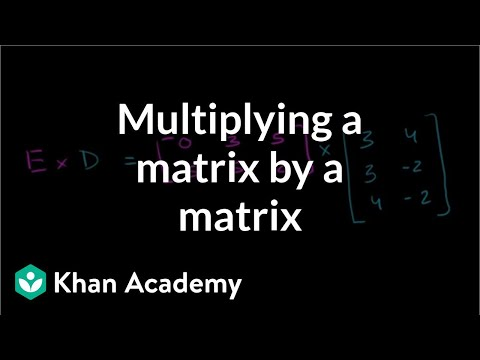

In [156]:
from IPython.display import YouTubeVideo
YouTubeVideo("OMA2Mwo0aZg", width="60%")

To summarize the video, the multiplication of two matrices $\bf{A}$ and $\bf{B}$ with dimensions $m$ by $n$ and $n$ by $p$ yields a matrix $\bf{C}$ with dimensions $m$ and $p$. To obtain an entry $c_{ij}$ of matrix $\bf{C}$ where $i$ and $j$ represent the index labels of the rows and columns, we have to calculate the dot product of the $i$th row vector of $\bf{A}$ with the $j$th column vector of $\bf{B}$. So, it makes a difference if we multiply $\bf{A}$ with $\bf{B}$ from the right or left.

When multiplying a `Matrix` with a `Vector`, we follow the convention that a `Vector` on the left is interpreted as a row vector and a `Vector` on the right as a column vector. The `Vector`'s length must match the `Matrix`'s corresponding dimension. As row and column vectors can be viewed as a `Matrix` as well, matrix-vector multiplication is a special case of matrix-matrix multiplication.

In the updated `Matrix` class, the  `__add__()`, `__radd__()`, `__sub__()`, `__rsub__()`, and `__truediv__()` methods follow the same logic as in the `Vector` class above.

Besides implementing scalar multiplication, `__mul__()` and `__rmul__()` are responsible for converting `Vector`s into `Matrix`s and back. In particular, all the different ways of performing a multiplication are reduced into *one* generic form, which is a matrix-matrix multiplication. That is achieved by the `_matrix_multiply()` method, another implementation detail.

In [157]:
class Matrix:

    def __init__(self, data):
        self._entries = list(list(float(x) for x in r) for r in data)
        # ...

    def __repr__(self):
        args = ", ".join("(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries)
        return f"Matrix(({args}))"

    @property
    def n_rows(self):
        return len(self._entries)

    @property
    def n_cols(self):
        return len(self._entries[0])

    def rows(self):
        return (Vector(r) for r in self._entries)

    def cols(self):
        return (
            Vector(self._entries[r][c] for r in range(self.n_rows)) for c in range(self.n_cols)
        )

    def __iter__(self):  # adapted for brevity; uses parts of entries()
        return (self._entries[r][c] for r in range(self.n_rows) for c in range(self.n_cols))

    def __add__(self, other):
        if isinstance(other, self.__class__):  # matrix addition
            if (self.n_rows != other.n_rows) or (self.n_cols != other.n_cols):
                raise ValueError("matrices need to be of the same dimensions")
            return Matrix((s_col + o_col for (s_col, o_col) in zip(s_row, o_row))
                          for (s_row, o_row) in zip(self._entries, other._entries))
        elif isinstance(other, numbers.Number):  # broadcasting addition
            return Matrix((c + other for c in r) for r in self._entries)
        return NotImplemented

    def __radd__(self, other):
        if isinstance(other, Vector):
            raise TypeError("vectors and matrices cannot be added")
        return self + other

    def __sub__(self, other):
        if isinstance(other, self.__class__):  # matrix subtraction
            if (self.n_rows != other.n_rows) or (self.n_cols != other.n_cols):
                raise ValueError("matrices need to be of the same dimensions")
            return Matrix((s_col - o_col for (s_col, o_col) in zip(s_row, o_row))
                          for (s_row, o_row) in zip(self._entries, other._entries))
        elif isinstance(other, numbers.Number):  # broadcasting subtraction
            return Matrix((c - other for c in r) for r in self._entries)
        return NotImplemented

    def __rsub__(self, other):
        if isinstance(other, Vector):
            raise TypeError("vectors and matrices cannot be subtracted")
        # Reverse matrix subtraction is already handled in __sub__().
        if isinstance(other, numbers.Number):  # broadcasting subtraction
            return Matrix((other - c for c in r) for r in self._entries)
        return NotImplemented
    
    def _matrix_multiply(self, other):
        if self.n_cols != other.n_rows:
            raise ValueError("matrices need to have compatible dimensions")
        return Matrix((rv * cv for cv in other.cols()) for rv in self.rows())

    def __mul__(self, other):
        if isinstance(other, numbers.Number):
            return Matrix((x * other for x in r) for r in self._entries)
        elif isinstance(other, Vector):
            return self._matrix_multiply(other.as_matrix()).as_vector()
        elif isinstance(other, self.__class__):
            return self._matrix_multiply(other)
        return NotImplemented

    def __rmul__(self, other):
        if isinstance(other, numbers.Number):
            return self * other
        elif isinstance(other, Vector):
            return other.as_matrix(column=False)._matrix_multiply(self).as_vector()
        return NotImplemented

    def __truediv__(self, other):
        if isinstance(other, numbers.Number):
            return self * (1 / other)
        return NotImplemented

    def as_vector(self):
        if not (self.n_rows == 1 or self.n_cols == 1):
            raise RuntimeError("one dimension (m or n) must be 1")
        return Vector(x for x in self)

In [158]:
m = Matrix([(1, 2, 3), (4, 5, 6), (7, 8, 9)])
n = Matrix([(10, 11, 12), (13, 14, 15)])

Scalar multiplication, addition, and subtraction work as before.

In [159]:
10 * m

Matrix(((10.000, 20.000, 30.000,), (40.000, 50.000, 60.000,), (70.000, 80.000, 90.000,)))

In [160]:
(2 * m + m * 3) / 5

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

In [161]:
m - m

Matrix(((0.000, 0.000, 0.000,), (0.000, 0.000, 0.000,), (0.000, 0.000, 0.000,)))

Matrix-matrix multiplication works if the dimensions are compatible ...

In [162]:
n * m

Matrix(((138.000, 171.000, 204.000,), (174.000, 216.000, 258.000,)))

... and results in a `ValueError` otherwise.

In [163]:
m * n

ValueError: matrices need to have compatible dimensions

The same holds for matrix-vector and vector-matrix multiplication. These operations always return `Vector` instances in line with standard linear algebra. If a `Vector`'s length is not compatible with the respective dimension of a `Matrix`, we receive a `ValueError`.

In [164]:
m * v

Vector((14.000, 32.000, 50.000))

In [165]:
v * m

Vector((30.000, 36.000, 42.000))

In [166]:
n * v

Vector((68.000, 86.000))

In [167]:
v * n

ValueError: matrices need to have compatible dimensions

Lastly, the broadcasting addition and subtraction also work for our `Matrix` instances.

In [168]:
m + 100

Matrix(((101.000, 102.000, 103.000,), (104.000, 105.000, 106.000,), (107.000, 108.000, 109.000,)))

In [169]:
100 - m

Matrix(((99.000, 98.000, 97.000,), (96.000, 95.000, 94.000,), (93.000, 92.000, 91.000,)))

We do not allow addition or subtraction of matrices with vectors and raise a `TypeError` instead. Alternatively, we could have implemented broadcasting here as well, just like [numpy](https://www.numpy.org/) does.

In [170]:
m + v

TypeError: vectors and matrices cannot be added

### Relational Operators

As we have seen above, two different `Vector`s with the same `_entries` do *not* compare equal. The reason is that for user-defined types Python by default only assumes two instances to be equal if they are actually the same object. This is, of course, semantically wrong for our `Vector`s and `Matrix`s.

In [171]:
v = Vector([1, 2, 3])
w = Vector([1, 2, 3])

In [172]:
v == w

False

In [173]:
v == v

True

We implement the `__eq__()` (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#object.__eq__)) method to control how the binary comparison operator `==` is carried out. For brevity, we show this only for the `Vector` class. The `__eq__()` method exits early as soon as the first pair of entries does not match. Also, for reasons discussed in [Chapter 5 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/05_numbers_00_content.ipynb#Imprecision), we compare the absolute difference of two corresponding entries to a very small `zero_threshold` that is stored as a class attribute. If the `Vector`s differ in their numbers of entries, we fail loudly and raise a `ValueError`. Alternatively, we could fail silently and return `False` instead.

In [174]:
class Vector:

    zero_threshold = 1e-12

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __len__(self):
        return len(self._entries)

    def __iter__(self):
        return iter(self._entries)

    def __eq__(self, other):
        if isinstance(other, self.__class__):
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            for x, y in zip(self, other):
                if abs(x - y) > self.zero_threshold:
                    return False
            return True
        return NotImplemented

In [175]:
v = Vector([1, 2, 3])
w = Vector([1, 2, 3])

In [176]:
v == w

True

Besides `__eq__()`, there are other special methods to implement the `!=`, `<`, `>`, `<=`, and `>=` operators. However, Python implicitly creates the `!=` for us in that it just inverts the result of `__eq__()`. The remaining four operators are not semantically meaningful in the context of linear algebra.

## Number Emulation

Our `Vector` and `Matrix` classes do not fully behave like a `numbers.Number` in the abstract sense. Besides the not yet talked about but useful unary `+` and `-` operators, numbers in Python usually support being passed to built-in functions like [abs() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#abs), [bin() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#bin), [bool() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#bool), [complex() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#complex), [float() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#float), [hex() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#hex), [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int), and others (cf., the [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types) for an exhaustive list).

To see that our classes lack simple but expected behaviors, let's try to invert the signs of all entries in the vector `v`.

In [177]:
v

Vector((1.000, 2.000, 3.000))

In [178]:
-v

TypeError: bad operand type for unary -: 'Vector'

For our example, we decide to implement the unary `+` and `-` operators, [abs() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#abs) as the Euclidean / Frobenius norm (i.e., the [magnitude <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Magnitude_%28mathematics%29#Euclidean_vector_space)), [bool() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#bool) to check if that norm is greater than `0` or not, and [float() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#float) to obtain a single scalar if the vector or matrix consists of only one entry. To achieve that, we implement the `__pos__()`, `__neg__()`, `__abs__()`, `__bool__()`, and `__float__()` methods. For brevity, we do this only for the `Vector` class.

In [179]:
class Vector:

    def __init__(self, data):
        self._entries = list(float(x) for x in data)
        # ...

    def __repr__(self):
        args = ", ".join(f"{x:.3f}" for x in self)
        return f"Vector(({args}))"

    def __iter__(self):
        return iter(self._entries)

    def __len__(self):
        return len(self._entries)

    def __pos__(self):
        return self

    def __neg__(self):
        return Vector(-x for x in self)

    def __abs__(self):
        return norm(self)

    def __bool__(self):
        return bool(abs(self))

    def __float__(self):
        if len(self) != 1:
            raise RuntimeError("vector must have one entry to become a scalar")
        return self._entries[0]

In [180]:
v = Vector([1, 2, 3])
w = Vector([3, 4])

z = Vector([0, 0])
s = Vector([42])

The unary `+` operator is not only conceptually an identity operator but simply returns the instance itself.

In [181]:
+v

Vector((1.000, 2.000, 3.000))

In [182]:
+v is v

True

In [183]:
-w

Vector((-3.000, -4.000))

The magnitude of a `Vector` is only `0` if *all* entries are `0`.

In [184]:
abs(w)

5.0

In [185]:
abs(z)

0.0

Only an all `0`s `Vector` is `False` in a boolean context.

In [186]:
bool(v)

True

In [187]:
bool(z)

False

Lastly, single entry `Vector`s can be casted as scalars.

In [188]:
float(s)

42.0

In [189]:
float(v)

RuntimeError: vector must have one entry to become a scalar

## The whole Picture

Below are the two final implementations of the `Vector` and `Matrix` classes that integrate all of the functionalities introduced in this chapter. The code is cleaned up and fully documented.

The `storage` and `typing` **class attributes** are added referencing the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) and [float() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#float) built-ins. These class attributes are then used in the `__init__()` methods as defaults. They can be used just like instance attributes on the `self` object directly. If an attribute is not defined on an instance, Python first checks if it can fall back to the same name on the corresponding class object before it raises an `AttributeError`. If we want to refer to a class attribute right away, we could replace the `self.storage` and `self.typing` with `self.__class__.storage` and `self.__class__.typing` respectively.

Also, we replace the text strings `"Vector"` and `"Matrix"` in the `__repr__()` and `__str__()` methods with `self.__class__.__name__`. This way, we only use the names of the classes in the `class` statements' header lines. Similarly, we replace all class instantiations of the form `Vector()` and `Matrix()` with `self.__class__()` to avoid using the classes' names again.

Lastly, we adapt the `__sub__()` and `__rsub__()` methods to use the negation provided by `__neg__()` and then dispatch to `__add__()` for code reuse.

In [190]:
class Vector:
    """A standard one-dimensional vector from linear algebra.

    Attributes:
        storage (callable): must return an iterable that is used
            to store the entries of the vector; defaults to list
        typing (callable): type casting applied to all vector
            entries upon creation; defaults to float
        zero_threshold (float): maximum difference allowed when
            comparing an entry to zero; defaults to 1e-12
    """

    storage = list
    typing = float
    zero_threshold = 1e-12

    def __init__(self, data):
        """Initiate a new vector.

        Args:
            data (iterable): the vector's entries;
                must be finite and have at least one element

        Raises:
            ValueError: if the provided data do not have enough entries
        """
        self._entries = self.storage(self.typing(x) for x in data)
        if len(self) == 0:
            raise ValueError("a vector must have at least one entry")

    def __repr__(self):
        name, args = self.__class__.__name__, ", ".join(f"{x:.3f}" for x in self)
        return f"{name}(({args}))"

    def __str__(self):
        name = self.__class__.__name__
        first, last, entries = self[0], self[-1], len(self)
        return f"{name}({first:.1f}, ..., {last:.1f})[{entries:d}]"

    def __len__(self):
        return len(self._entries)

    def __getitem__(self, index):
        return self._entries[index]

    def __iter__(self):
        return iter(self._entries)

    def __reversed__(self):
        return reversed(self._entries)

    def __add__(self, other):
        if isinstance(other, self.__class__):
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            return self.__class__(x + y for (x, y) in zip(self, other))
        elif isinstance(other, numbers.Number):
            return self.__class__(x + other for x in self)
        return NotImplemented

    def __radd__(self, other):
        return self + other

    def __sub__(self, other):
        return self + (- other)

    def __rsub__(self, other):
        return (- self) + other

    def __mul__(self, other):
        if isinstance(other, self.__class__):
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            return sum(x * y for (x, y) in zip(self, other))
        elif isinstance(other, numbers.Number):
            return self.__class__(x * other for x in self)
        return NotImplemented

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        if isinstance(other, numbers.Number):
            return self * (1 / other)
        return NotImplemented

    def __eq__(self, other):
        if isinstance(other, self.__class__):
            if len(self) != len(other):
                raise ValueError("vectors need to be of the same length")
            for x, y in zip(self, other):
                if abs(x - y) > self.zero_threshold:
                    return False
            return True
        return NotImplemented

    def __pos__(self):
        return self

    def __neg__(self):
        return self.__class__(-x for x in self)

    def __abs__(self):
        """The Euclidean norm of the vector."""
        return norm(self)

    def __bool__(self):
        return bool(abs(self))

    def __float__(self):
        if len(self) != 1:
            raise RuntimeError("vector must have one entry to become a scalar")
        return self[0]

    def as_matrix(self, *, column=True):
        """Convert the vector into a matrix.

        Args:
            column (bool): if the vector should be interpreted as
                as a column vector or not; defaults to True

        Returns:
            matrix (Matrix)
        """
        if column:
            return Matrix([x] for x in self)
        return Matrix([(x for x in self)])

In [191]:
class Matrix:
    """A standard m-by-n-dimensional matrix from linear algebra.

    Attributes:
        storage (callable): must return an iterable that is used
            to store the entries of the matrix; defaults to list
        typing (callable): type casting applied to all vector
            entries upon creation; defaults to float
        zero_threshold (float): maximum difference allowed when
            comparing an entry to zero; defaults to 1e-12
    """

    storage = list
    typing = float
    zero_threshold = 1e-12

    def __init__(self, data):
        """Initiate a new matrix.

        Args:
            data (iterable of iterables): the matrix's entries;
                the inner iterables represent the rows;
                the number of column entries must be consistent across rows
                where the first row sets the standard;
                must be finite and have at least one element

        Raises:
            ValueError:
                - if the number of columns is inconsistent across rows
                - if the provided data do not have enough entries
        """
        self._entries = self.storage(
            self.storage(self.typing(x) for x in r) for r in data
        )
        for row in self._entries[1:]:
            if len(row) != self.n_cols:
                raise ValueError("rows must have the same number of entries")
        if len(self) == 0:
            raise ValueError("a matrix must have at least one entry")

    @classmethod
    def from_columns(cls, data):
        """Initiate a new matrix.

        An alternative constructor for data provided in column-major order.

        Args:
            data (iterable of iterables): the matrix's entries;
                the inner iterables represent the columns;
                the number of row entries must be consistent per column
                where the first column sets the standard;
                must be finite and have at least one element

        Raises:
            ValueError:
                - if the number of rows is inconsistent across columns
                - if the provided data do not have enough entries
        """
        return cls(data).transpose()

    def __repr__(self):
        name = self.__class__.__name__
        args = ", ".join(
            "(" + ", ".join(f"{c:.3f}" for c in r) + ",)" for r in self._entries
        )
        return f"{name}(({args}))"

    def __str__(self):
        name = self.__class__.__name__
        first, last, m, n = self[0], self[-1], self.n_rows, self.n_cols
        return f"{name}(({first:.1f}, ...), ..., (..., {last:.1f}))[{m:d}x{n:d}]"

    @property
    def n_rows(self):
        """Number of rows in the matrix."""
        return len(self._entries)

    @property
    def n_cols(self):
        """Number of columns in the matrix."""
        return len(self._entries[0])

    def __len__(self):
        return self.n_rows * self.n_cols

    def __getitem__(self, index):
        if isinstance(index, int):
            if index < 0:
                index += len(self)
            if not (0 <= index < len(self)):
                raise IndexError("integer index out of range")
            row, col = divmod(index, self.n_cols)
            return self._entries[row][col]
        elif (
            isinstance(index, tuple) and len(index) == 2
            and isinstance(index[0], int) and isinstance(index[1], int)
        ):
            return self._entries[index[0]][index[1]]
        raise TypeError("index must be either an int or a tuple of two int's")

    def rows(self):
        """Loop over the rows of the matrix.

        Returns:
            rows (Generator): produces Vectors representing
                individual rows of the matrix
        """
        return (Vector(r) for r in self._entries)

    def cols(self):
        """Loop over the columns of the matrix.

        Returns:
            columns (Generator): produces Vectors representing
                individual columns of the matrix
        """
        return (
            Vector(self._entries[r][c] for r in range(self.n_rows))
            for c in range(self.n_cols)
        )

    def entries(self, *, reverse=False, row_major=True):
        """Loop over the entries of the matrix.

        Args:
            reverse (bool): flag to loop backwards; defaults to False
            row_major (bool): flag to loop in row major order; defaults to False

        Returns:
            entries (Generator): produces the entries of the matrix
        """
        if reverse:
            rows = range(self.n_rows - 1, -1, -1)
            cols = range(self.n_cols - 1, -1, -1)
        else:
            rows, cols = range(self.n_rows), range(self.n_cols)
        if row_major:
            return (self._entries[r][c] for r in rows for c in cols)
        return (self._entries[r][c] for c in cols for r in rows)

    def __iter__(self):
        return self.entries()

    def __reversed__(self):
        return self.entries(reverse=True)
    
    def __add__(self, other):
        if isinstance(other, self.__class__):
            if (self.n_rows != other.n_rows) or (self.n_cols != other.n_cols):
                raise ValueError("matrices need to be of the same dimensions")
            return self.__class__(
                (s_col + o_col for (s_col, o_col) in zip(s_row, o_row))
                for (s_row, o_row) in zip(self._entries, other._entries)
            )
        elif isinstance(other, numbers.Number):
            return self.__class__((c + other for c in r) for r in self._entries)
        return NotImplemented

    def __radd__(self, other):
        if isinstance(other, Vector):
            raise TypeError("vectors and matrices cannot be added")
        return self + other

    def __sub__(self, other):
        return self + (-other)

    def __rsub__(self, other):
        if isinstance(other, Vector):
            raise TypeError("vectors and matrices cannot be subtracted")
        return (-self) + other

    def _matrix_multiply(self, other):
        if self.n_cols != other.n_rows:
            raise ValueError("matrices need to have compatible dimensions")
        return self.__class__(
            (rv * cv for cv in other.cols()) for rv in self.rows()
        )

    def __mul__(self, other):
        if isinstance(other, numbers.Number):
            return self.__class__((x * other for x in r) for r in self._entries)
        elif isinstance(other, Vector):
            return self._matrix_multiply(other.as_matrix()).as_vector()
        elif isinstance(other, self.__class__):
            return self._matrix_multiply(other)
        return NotImplemented

    def __rmul__(self, other):
        if isinstance(other, numbers.Number):
            return self * other
        elif isinstance(other, Vector):
            return (
                other.as_matrix(column=False)._matrix_multiply(self).as_vector()
            )
        return NotImplemented

    def __truediv__(self, other):
        if isinstance(other, numbers.Number):
            return self * (1 / other)
        return NotImplemented

    def __eq__(self, other):
        if isinstance(other, self.__class__):
            if (self.n_rows != other.n_rows) or (self.n_cols != other.n_cols):
                raise ValueError("matrices need to be of the same dimensions")
            for x, y in zip(self, other):
                if abs(x - y) > self.zero_threshold:
                    return False
            return True
        return NotImplemented

    def __pos__(self):
        return self

    def __neg__(self):
        return self.__class__((-x for x in r) for r in self._entries)

    def __abs__(self):
        """The Frobenius norm of the matrix."""
        return norm(self)

    def __bool__(self):
        return bool(abs(self))

    def __float__(self):
        if not (self.n_rows == 1 and self.n_cols == 1):
            raise RuntimeError("matrix must have one entry to become a scalar")
        return self[0]

    def as_vector(self):
        """Cast the matrix as a one-dimensional vector.

        Returns:
            vector (Vector)

        Raises:
            RuntimeError: if not one of the two dimensions is 1
        """
        if not (self.n_rows == 1 or self.n_cols == 1):
            raise RuntimeError("one dimension (m or n) must be 1")
        return Vector(x for x in self)

    def transpose(self):
        """Switch the rows and columns of the matrix.

        Returns:
            matrix (Matrix)
        """
        return self.__class__(zip(*self._entries))

Let's do some math with bigger `Matrix` and `Vector` instances.

In [192]:
import random

In [193]:
random.seed(42)

We initialize `m` with random numbers in the range between `0` and `1000`.

In [194]:
m = Matrix((1000 * random.random() for _ in range(50)) for _ in range(100))

We quickly lose track with all the numbers in the matrix, which is why we implemented the `__str__()` method as a summary representation.

In [195]:
m

Matrix(((639.427, 25.011, 275.029, 223.211, 736.471, 676.699, 892.180, 86.939, 421.922, 29.797, 218.638, 505.355, 26.536, 198.838, 649.884, 544.941, 220.441, 589.266, 809.430, 6.499, 805.819, 698.139, 340.251, 155.479, 957.213, 336.595, 92.746, 96.716, 847.494, 603.726, 807.128, 729.732, 536.228, 973.116, 378.534, 552.041, 829.405, 618.520, 861.707, 577.352, 704.572, 45.824, 227.898, 289.388, 79.792, 232.791, 101.001, 277.974, 635.684, 364.832,), (370.181, 209.507, 266.978, 936.655, 648.035, 609.131, 171.139, 729.127, 163.402, 379.455, 989.523, 640.000, 556.950, 684.614, 842.852, 776.000, 229.048, 32.100, 315.453, 267.741, 210.983, 942.910, 876.368, 314.678, 655.439, 395.632, 914.548, 458.852, 264.880, 246.628, 561.368, 262.742, 584.586, 897.823, 399.401, 219.321, 997.538, 509.526, 90.909, 47.116, 109.649, 627.446, 792.079, 422.160, 63.528, 381.619, 996.121, 529.114, 971.078, 860.780,), (11.481, 720.722, 681.710, 536.970, 266.825, 640.962, 111.552, 434.765, 453.724, 953.816, 875.853, 2

In [196]:
print(m)

Matrix((639.4, ...), ..., (..., 353.9))[100x50]


In [197]:
v = Vector(1000 * random.random() for _ in range(50))

In [198]:
v

Vector((129.713, 562.634, 519.706, 631.858, 492.504, 179.907, 609.406, 708.587, 979.258, 1.581, 23.987, 625.461, 117.926, 848.070, 799.564, 998.987, 414.041, 333.792, 560.416, 637.504, 11.297, 201.187, 281.627, 790.196, 307.773, 506.690, 323.924, 6.131, 685.836, 341.362, 724.397, 615.993, 29.117, 175.629, 330.515, 337.937, 672.473, 916.163, 797.254, 645.652, 481.496, 627.200, 892.058, 536.968, 335.110, 783.989, 413.953, 742.585, 835.106, 299.344))

In [199]:
print(v)

Vector(129.7, ..., 299.3)[50]


The arithmetic works as before.

In [200]:
w = m * v

In [201]:
print(w)

Vector(11378937.3, ..., 13593029.3)[100]


We can multiply `m` with its transpose or the other way round.

In [202]:
n = m * m.transpose()

In [203]:
print(n)

Matrix((14370711.3, ...), ..., (..., 16545418.2))[100x100]


In [204]:
o = m.transpose() * m

In [205]:
print(o)

Matrix((32618511.5, ...), ..., (..., 32339164.8))[50x50]


## Comparison with [numpy](https://www.numpy.org/)

We started out in this chapter by realizing that Python provides us no good data type to model a vector $\vec{v}$ or a matrix $\bf{X}$. Then, we built up two custom data types `Vector` and `Matrix` that wrap a simple `list` object for $\vec{v}$ and a `list` of `list`s for $\bf{X}$ so that we can interact with their `_entries` in a "natural" (i.e., similar to how we write linear algebra tasks by hand) *and* Pythonic (i.e., how we typically interact with objects in Python) way. By doing this, we extend Python with our own little "dialect" or [DSL <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Domain-specific_language).

If we feel like sharing our linear algebra library with the world, we could easily do so on either [GitHub <img height="12" style="display: inline-block" src="static/link_to_gh.png">](https://github.com) or [PyPI](https://pypi.org). However, for the domain of linear algebra this would be rather pointless as there is already a widely adopted library with [numpy](https://www.numpy.org/) that not only has a lot more features than ours but also is implemented in C, which makes it a lot faster with big data.

Let's take a quick look at [numpy](https://www.numpy.org/) and compare it with our DSL using the example from the top.

In [206]:
y = (1, 2, 3)
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [207]:
X * y

TypeError: can't multiply sequence by non-int of type 'tuple'

The creation of vectors and matrices is similar to our DSL. However, numpy uses the more general concept of an **n-dimensional array** where a vector is only a special case of a matrix and a matrix is yet another special case of an even higher dimensional structure.

In [208]:
import numpy as np

In [209]:
y_arr = np.array(y)
X_arr = np.array(X)

In [210]:
y_vec = Vector(y)
X_mat = Matrix(X)

The text representations are very similar. However, the [numpy](https://www.numpy.org/) arrays keep the entries as `int`s.

In [211]:
y_arr

array([1, 2, 3])

In [212]:
y_vec

Vector((1.000, 2.000, 3.000))

In [213]:
X_arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [214]:
X_mat

Matrix(((1.000, 2.000, 3.000,), (4.000, 5.000, 6.000,), (7.000, 8.000, 9.000,)))

[numpy](https://www.numpy.org/) arrays come with a `shape` instance attribute that returns a `tuple` with the dimensions.

In [215]:
y_arr.shape

(3,)

In [216]:
X_arr.shape

(3, 3)

In [217]:
X_mat.n_rows, X_mat.n_cols

(3, 3)

The built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function does not return the number of entries in the array but the number of the rows instead. This is equivalent to the first element in the `shape` attribute.

In [218]:
len(y_arr)

3

In [219]:
len(y_vec)

3

In [220]:
len(X_arr)

3

In [221]:
len(X_mat)

9

The `transpose()` method also exists for arrays.

In [222]:
X_arr.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [223]:
X_mat.transpose()

Matrix(((1.000, 4.000, 7.000,), (2.000, 5.000, 8.000,), (3.000, 6.000, 9.000,)))

To perform matrix-matrix, matrix-vector, or vector-matrix multiplication in [numpy](https://www.numpy.org/), we use the `dot()` method. If we use the `*` operator on arrays, an entry-wise multiplication is performed.

In [224]:
X_arr.dot(y_arr)

array([14, 32, 50])

In [225]:
X_arr * y_arr

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

In [226]:
X_mat * y_vec

Vector((14.000, 32.000, 50.000))

Scalar multiplication, however, works as expected.

In [227]:
10 * y_arr

array([10, 20, 30])

In [228]:
10 * y_vec

Vector((10.000, 20.000, 30.000))

Because we implemented our classes to support the sequence protocol, numpy's one-dimensional arrays are actually able to work with them. Note that the `*` operator is applied on a per-entry basis.

In [229]:
y_arr + y_vec

array([2., 4., 6.])

In [230]:
y_arr * y_vec

array([1., 4., 9.])

In [231]:
X_arr + X_mat

ValueError: operands could not be broadcast together with shapes (3,3) (9,) 

We conclude that it is rather easy to extend Python in a way that makes the resulting application code read like core Python again. As there are many well established third-party packages out there, it is unlikely that we have to implement a fundamental library ourselves.

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=ibDT0uOAOTI&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

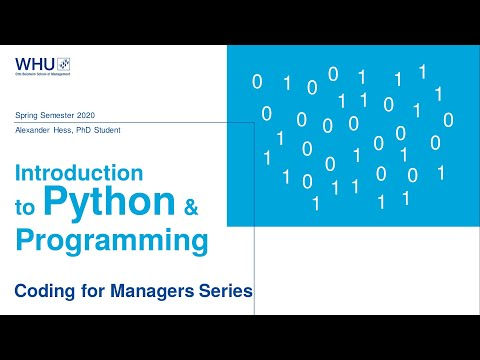

In [232]:
from IPython.display import YouTubeVideo
YouTubeVideo("ibDT0uOAOTI", width="60%")